In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/My Drive/df_cross_yf.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'reviewer_id', 'preference', 'listing_id',
       'host_is_superhost', 'latitude', 'longitude', 'price',
       'number_of_reviews_ltm', 'calculated_host_listings_count',
       'nearby_sites_rating', 'nearest_station_dist',
       'host_response_time_cross_rate', 'item_factor_0', 'user_factor_0',
       'item_factor_1', 'user_factor_1', 'item_factor_2', 'user_factor_2',
       'item_factor_3', 'user_factor_3', 'item_factor_4', 'user_factor_4',
       'item_factor_5', 'user_factor_5', 'item_factor_6', 'user_factor_6',
       'item_factor_7', 'user_factor_7', 'item_factor_8', 'user_factor_8',
       'item_factor_9', 'user_factor_9'],
      dtype='object')

In [ ]:
y = df.preference

In [ ]:
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

In [ ]:
df.columns

Index(['reviewer_id', 'preference', 'listing_id', 'host_is_superhost',
       'latitude', 'longitude', 'price', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'nearby_sites_rating',
       'nearest_station_dist', 'host_response_time_cross_rate',
       'item_factor_0', 'user_factor_0', 'item_factor_1', 'user_factor_1',
       'item_factor_2', 'user_factor_2', 'item_factor_3', 'user_factor_3',
       'item_factor_4', 'user_factor_4', 'item_factor_5', 'user_factor_5',
       'item_factor_6', 'user_factor_6', 'item_factor_7', 'user_factor_7',
       'item_factor_8', 'user_factor_8', 'item_factor_9', 'user_factor_9'],
      dtype='object')

In [ ]:
X = df.drop(columns=["reviewer_id","listing_id"])

In [ ]:
X.drop(columns=["preference"],inplace=True)

In [ ]:
X.head()

,host_is_superhost,latitude,longitude,price,number_of_reviews_ltm,calculated_host_listings_count,nearby_sites_rating,nearest_station_dist,host_response_time_cross_rate,item_factor_0,user_factor_0,item_factor_1,user_factor_1,item_factor_2,user_factor_2,item_factor_3,user_factor_3,item_factor_4,user_factor_4,item_factor_5,user_factor_5,item_factor_6,user_factor_6,item_factor_7,user_factor_7,item_factor_8,user_factor_8,item_factor_9,user_factor_9
0,0,1.44255,103.79580,79.0,0,2,0.995731,0.617762,2.0,-0.080090,-0.045423,-0.072907,0.119669,0.077274,0.045258,0.037663,0.085235,-0.038879,0.009194,0.038809,-0.038233,0.030629,-0.072737,0.032604,0.082893,0.287333,-0.098187,0.089866,0.021846
1,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.049855,-0.105953,0.044933,-0.116901,0.131527,-0.017028,0.111009,-0.086785,-0.002848,-0.020847,0.074678,-0.037473,-0.052219,-0.075626,-0.012367,0.034406,0.001945,0.085947,0.008726
2,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.045758,-0.105953,-0.057649,-0.116901,-0.014033,-0.017028,0.041884,-0.086785,0.181634,-0.020847,-0.046492,-0.037473,-0.133720,-0.075626,-0.118024,0.034406,0.067946,0.085947,-0.158080
3,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,0.028973,-0.105953,0.145273,-0.116901,0.066612,-0.017028,-0.063751,-0.086785,0.176873,-0.020847,-0.142651,-0.037473,0.024285,-0.075626,0.007321,0.034406,0.025454,0.085947,0.055499
4,0,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.055366,-0.105953,-0.037461,-0.116901,0.030717,-0.017028,0.059124,-0.086785,0.139225,-0.020847,0.046353,-0.037473,-0.032285,-0.075626,-0.020036,0.034406,0.008693,0.085947,-0.050897


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import numpy as np

def mse(y_predicted, y_true):
  return np.mean(np.square(y_predicted - y_true))
mse_training = mse(lr.predict(X_train), y_train)
mse_testing = mse(lr.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.024313141103912996, testing mse: 0.02438069313635963
training rmse: 0.1559267170946435, testing rmse: 0.15614318152375284


# Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [ ]:
forest = RandomForestRegressor(random_state = 1, n_estimators = 10, min_samples_split = 2)
params = {
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }

rf = GridSearchCV(forest, params, cv = 3, verbose = 1, n_jobs = -1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  9.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [ ]:
print('best parameters: ', rf.best_params_)

best parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
mse_training = mse(rf.predict(X_train), y_train)
mse_testing = mse(rf.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.02000335159335936, testing mse: 0.02188765627153034
training rmse: 0.141433205412871, testing rmse: 0.1479447743975107


# XGBRegressor

In [4]:
from xgboost import XGBRegressor

In [7]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.03, 0.05], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [10,20]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)


NameError: ignored

In [ ]:
y_train_pred = xgb_grid.predict(X_train)
y_pred = xgb_grid.predict(X_test)
mse_training = mse(xgb_grid.predict(X_train), y_train)
mse_testing = mse(xgb_grid.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.03615596960467331, testing mse: 0.03674544708752492
training rmse: 0.1901472313883989, testing rmse: 0.19169101984058856


In [ ]:
xgb_grid.best_estimator_.feature_importances_

array([0.7384785 , 0.00982139, 0.01821585, 0.02321639, 0.01683902,
       0.04075652, 0.01497753, 0.01440454, 0.01743021, 0.01170048,
       0.00197531, 0.00652407, 0.00268669, 0.00875849, 0.00350802,
       0.00579854, 0.00300764, 0.00794917, 0.00358986, 0.00622467,
       0.00392662, 0.00725924, 0.00317752, 0.00686934, 0.00344898,
       0.00560186, 0.00314865, 0.0075481 , 0.00315689], dtype=float32)

<BarContainer object of 29 artists>

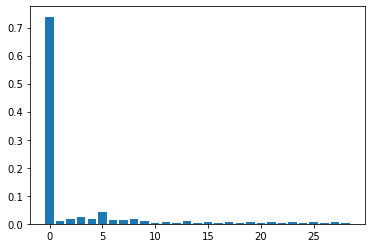

In [ ]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_grid.best_estimator_.feature_importances_)), xgb_grid.best_estimator_.feature_importances_)

# Experiments

In [ ]:
X = df.drop(columns=["reviewer_id","listing_id","host_is_superhost"])
X.drop(columns=["preference"],inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import numpy as np

def mse(y_predicted, y_true):
  return np.mean(np.square(y_predicted - y_true))
mse_training = mse(lr.predict(X_train), y_train)
mse_testing = mse(lr.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.025649497166801805, testing mse: 0.025776744128859372
training rmse: 0.16015460395131265, testing rmse: 0.16055137535648634


In [ ]:
forest = RandomForestRegressor(random_state = 1, n_estimators = 10, min_samples_split = 2)
params = {
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }

rf = GridSearchCV(forest, params, cv = 3, verbose = 1, n_jobs = -1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  9.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
mse_training = mse(rf.predict(X_train), y_train)
mse_testing = mse(rf.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.020510930663753934, testing mse: 0.022344465768639327
training rmse: 0.14321637707941762, testing rmse: 0.149480653492816


In [ ]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.03, 0.05], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [10,20]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  48 out of  48 | elapsed:  1.6min finished


[14:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'learning_rate': [0.03, 0.05], 'max_depth': [5, 6, 7],
                         'n_estimators': [10, 20],
    

In [ ]:
y_train_pred = xgb_grid.predict(X_train)
y_pred = xgb_grid.predict(X_test)
mse_training = mse(xgb_grid.predict(X_train), y_train)
mse_testing = mse(xgb_grid.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.03651781047096904, testing mse: 0.03708927393340363
training rmse: 0.1910963381935118, testing rmse: 0.19258575734826194


In [ ]:
xgb_grid.best_estimator_.feature_importances_

array([0.03908768, 0.08489899, 0.09805109, 0.06114793, 0.1583974 ,
       0.06294014, 0.04421329, 0.07265474, 0.02857265, 0.00609975,
       0.03023951, 0.0070869 , 0.03047134, 0.0106923 , 0.02892784,
       0.0087331 , 0.02883472, 0.01044984, 0.02888002, 0.00860162,
       0.0250526 , 0.01174619, 0.02550741, 0.00943681, 0.02616491,
       0.00916976, 0.0328128 , 0.01112848], dtype=float32)

<BarContainer object of 28 artists>

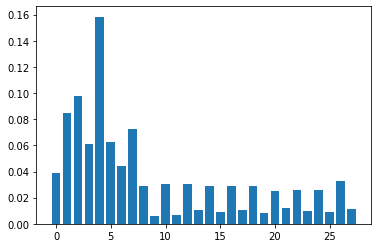

In [ ]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_grid.best_estimator_.feature_importances_)), xgb_grid.best_estimator_.feature_importances_)

In [ ]:
X_train.columns

Index(['latitude', 'longitude', 'price', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'nearby_sites_rating',
       'nearest_station_dist', 'host_response_time_cross_rate',
       'item_factor_0', 'user_factor_0', 'item_factor_1', 'user_factor_1',
       'item_factor_2', 'user_factor_2', 'item_factor_3', 'user_factor_3',
       'item_factor_4', 'user_factor_4', 'item_factor_5', 'user_factor_5',
       'item_factor_6', 'user_factor_6', 'item_factor_7', 'user_factor_7',
       'item_factor_8', 'user_factor_8', 'item_factor_9', 'user_factor_9'],
      dtype='object')

In [ ]:
X = df.host_is_superhost.values
X = X.reshape(-1,1)
y = df.preference.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import numpy as np
def mse(y_predicted, y_true):
  return np.mean(np.square(y_predicted - y_true))
mse_training = mse(lr.predict(X_train), y_train)
mse_testing = mse(lr.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.02457318679353732, testing mse: 0.02463228104768895
training rmse: 0.15675837072876625, testing rmse: 0.15694674589710023


In [ ]:
data_1 = pd.read_csv('/content/drive/My Drive/BT4222 Data/Data_1 (TF-IDF + Little_Listing_Features + SVD).csv')

In [ ]:
data_1.drop(columns=["Unnamed: 0","reviewer_id","listing_id"],inplace=True)

In [ ]:
X = data_1.drop("preference",axis = 1)
y = 10**data_1.preference
y = (y - y.min()) / (y.max() - y.min())

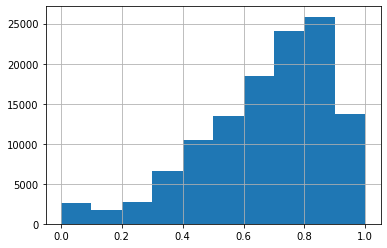

In [ ]:
y.hist()

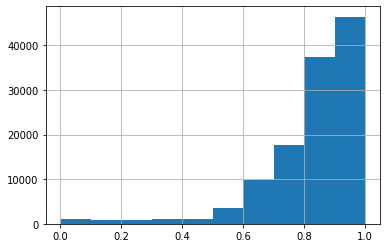

In [ ]:
data_1.preference.hist()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mse_training = mse(lr.predict(X_train), y_train)
mse_testing = mse(lr.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.03763744647119689, testing mse: 0.03735615217355394
training rmse: 0.19400372798272947, testing rmse: 0.19327739695462048


In [ ]:
forest = RandomForestRegressor(random_state = 1, n_estimators = 10, min_samples_split = 2)
params = {
            'max_depth': [10],
            'min_samples_split': [5],
            'min_samples_leaf': [2, 5]
        }

forest = GridSearchCV(forest, params, cv = 3, verbose = 1, n_jobs = -1)
forest.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [ ]:
y_train_pred = forest.predict(X_train)
y_pred = forest.predict(X_test)
mse_training = mse(forest.predict(X_train), y_train)
mse_testing = mse(forest.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.03069071507312096, testing mse: 0.033043490980506886
training rmse: 0.17518765673734255, testing rmse: 0.18177868681588302


In [ ]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.03, 0.05], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [10,20]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  48 out of  48 | elapsed:  4.1min finished


[18:11:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'learning_rate': [0.03, 0.05], 'max_depth': [5, 6, 7],
                         'n_estimators': [10, 20],
    

In [ ]:
y_train_pred = xgb_grid.predict(X_train)
y_pred = xgb_grid.predict(X_test)
mse_training = mse(xgb_grid.predict(X_train), y_train)
mse_testing = mse(xgb_grid.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.039437256505488516, testing mse: 0.03971485020719864
training rmse: 0.19858815801927496, testing rmse: 0.19928585049420505


<BarContainer object of 129 artists>

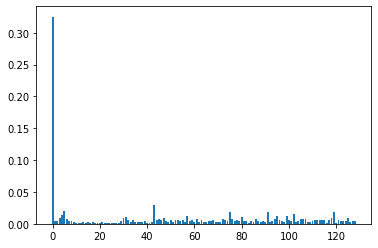

In [ ]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_grid.best_estimator_.feature_importances_)), xgb_grid.best_estimator_.feature_importances_)

In [ ]:
xgb_grid.best_estimator_.feature_importances_

array([0.32507518, 0.00411263, 0.00397177, 0.00905824, 0.01381729,
       0.02048876, 0.00723753, 0.00494464, 0.00409248, 0.00213978,
       0.00049843, 0.0017862 , 0.00051359, 0.00215894, 0.00058944,
       0.00213631, 0.00052012, 0.00204108, 0.00056778, 0.00173429,
       0.00052423, 0.00228194, 0.00061316, 0.00148961, 0.00059766,
       0.00197319, 0.00052196, 0.00143034, 0.0006722 , 0.00401112,
       0.00837602, 0.01140102, 0.00598373, 0.00311137, 0.00674175,
       0.00282845, 0.00314408, 0.00302086, 0.00246799, 0.00409843,
       0.0011564 , 0.00183019, 0.00315122, 0.02908966, 0.00533047,
       0.00774701, 0.00593717, 0.00898561, 0.00466333, 0.00264832,
       0.00567291, 0.00285237, 0.00605565, 0.0063672 , 0.00429652,
       0.00527119, 0.0031564 , 0.0129707 , 0.00489602, 0.00558628,
       0.00230649, 0.00686159, 0.00250409, 0.00558848, 0.00312884,
       0.00343518, 0.00406539, 0.00473983, 0.00653989, 0.00344678,
       0.0031002 , 0.00290768, 0.00780013, 0.00561053, 0.00377

In [ ]:
X = data_1.drop(columns = ["preference","host_is_superhost"],axis = 1)
y = data_1.host_is_superhost
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

dt_estimator = tree.DecisionTreeClassifier()
dt_estimator.fit(X_train, y_train)

y_predict = dt_estimator.predict(X_test)

report = """
The evaluation report of fully grown tree is:
Confusion Matrix:
{}
Accuracy: {}
""".format(confusion_matrix(y_test, y_predict),
           accuracy_score(y_test, y_predict))
print(report)


The evaluation report of fully grown tree is:
Confusion Matrix:
[[21951    30]
 [   24  7933]]
Accuracy: 0.9981962722960785



In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, class_weight="balanced")

params = {
            #'n_estimators': [100, 300],
            'max_depth': [5, 10, 20],
            #'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [2, 5]
        }

rf = GridSearchCV(forest, params, cv = 3, verbose = 1, 
                      n_jobs = -1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   26.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=1,
                              

In [ ]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)
print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.9997216469592713
Test accuracy 0.9983966864854031


In [ ]:
from xgboost import XGBClassifier
import numpy as np
xgb_model = XGBClassifier(objective = "binary:logistic")

#params = {
            #'eta': np.arange(0.01, 0.2, 0.05),
            #'min_child_weight': np.arange(1, 2, 0.5).tolist(),
            #'gamma': [0, 1, 2],
            #'subsample': np.arange(0.3, 0.6, 0.1).tolist(),
            #'colsample_bytree': np.arange(0.1, 0.5, 0.1).tolist(),
            #'max_depth': [4, 5, 6]
#        }
from sklearn.model_selection import StratifiedKFold, GridSearchCV

#skf = StratifiedKFold(n_splits=10, shuffle = True)
#xgb = GridSearchCV(xgb_model, 
#                    param_grid = params,  
#                    n_jobs = -1, 
#                    cv = skf.split(X_train, y_train),
#                    refit = "accuracy_score")

xgb_model.fit(X_train, y_train)
#print('best parameters: ', xgb.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score, make_scorer
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.9273387222482018
Test accuracy 0.9258467499498965


In [ ]:
xgb_model.feature_importances_

array([0.01280484, 0.01509224, 0.00621962, 0.00913223, 0.01077848,
       0.00650303, 0.00704691, 0.02980555, 0.        , 0.        ,
       0.00365685, 0.        , 0.00390954, 0.        , 0.00366751,
       0.        , 0.00401887, 0.        , 0.00042778, 0.        ,
       0.00555954, 0.        , 0.00367595, 0.        , 0.00544099,
       0.        , 0.        , 0.        , 0.00322016, 0.00557297,
       0.00507268, 0.00857844, 0.00811737, 0.01090214, 0.0054809 ,
       0.01262247, 0.01450487, 0.01882068, 0.01423463, 0.00768064,
       0.00289514, 0.01010862, 0.        , 0.01235116, 0.00704955,
       0.00562848, 0.00822782, 0.00302345, 0.00409624, 0.01440034,
       0.        , 0.        , 0.        , 0.01113804, 0.01093078,
       0.00486964, 0.00905318, 0.00407135, 0.00952091, 0.02126762,
       0.01299036, 0.01103359, 0.00613773, 0.00530209, 0.00227696,
       0.01662553, 0.0145585 , 0.00717423, 0.00773337, 0.04037858,
       0.00524803, 0.01444399, 0.01228357, 0.01259937, 0.01196

<BarContainer object of 128 artists>

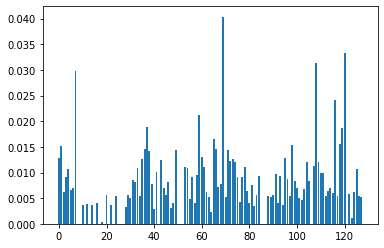

In [ ]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)

In [ ]:
features = pd.DataFrame(X_train.columns, columns = ["feature"])
features["importance"] = xgb_model.feature_importances_
select_10 = features.sort_values(by = "importance", ascending = False).head(10).feature

In [ ]:
select_10

69                    text_factor_41
120                   text_factor_92
108                   text_factor_80
7      host_response_time_cross_rate
116                   text_factor_88
59                    text_factor_31
37                     text_factor_9
119                   text_factor_91
65                    text_factor_37
118                   text_factor_90
Name: feature, dtype: object

In [9]:
lst = ['24', 'access', 'air', 'alarm', 'allowed', 'amenities', 'apartment', 'area', 'away', 'basics', 'bathroom', 'beautiful', 'bed', 'bedroom', 'board', 'br', 'bus', 'check', 'city', 'conditioning', 'cooker', 'cooking', 'designer', 'detector', 'dining', 'dishes', 'door', 'dryer', 'elevator', 'entrance', 'equipped', 'essentials', 'extinguisher', 'extra', 'following', 'food', 'free', 'friendly', 'fully', 'guest', 'guests', 'gym', 'hair', 'hangers', 'heating', 'high', 'home', 'host', 'hot', 'iron', 'just', 'kit', 'kitchen', 'laptop', 'linens', 'living', 'located', 'lock', 'long', 'luggage', 'machine', 'mattress', 'microwave', 'mins', 'minutes', 'mrt', 'orchard', 'paid', 'parking', 'place', 'pool', 'premises', 'private', 'queen', 'refrigerator', 'road', 'room', 'shampoo', 'shared', 'shopping', 'silverware', 'singapore', 'size', 'smoke', 'space', 'spacious', 'station', 'stay', 'stays', 'stove', 'table', 'term', 'tv', 'utensils', 'walk', 'washer', 'washing', 'water', 'wifi', 'workspace']

In [14]:
pd.DataFrame(lst).iloc[[41,92,80,88,31,9,91,37,90]]

,0
41,gym
92,tv
80,silverware
88,stays
31,essentials
9,basics
91,term
37,friendly
90,table


In [ ]:
from sklearn import preprocessing
X = data_1.drop(columns = ["preference","host_is_superhost"],axis = 1)
X = X.iloc[:,[69, 120, 108, 7, 116, 59, 37, 119, 65, 118]]
#X = preprocessing.normalize(X)
y = data_1.host_is_superhost
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

dt_estimator = tree.DecisionTreeClassifier()
dt_estimator.fit(X_train, y_train)

y_predict = dt_estimator.predict(X_test)

report = """
The evaluation report of fully grown tree is:
Confusion Matrix:
{}
Accuracy: {}
""".format(confusion_matrix(y_test, y_predict),
           accuracy_score(y_test, y_predict))
print(report)


The evaluation report of fully grown tree is:
Confusion Matrix:
[[21844    45]
 [   45  8004]]
Accuracy: 0.996993787160131



In [ ]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)